Libraries

In [1]:
import sys
import os
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FFMpegFileWriter
import pandas as pd

Aproximatly Function

In [2]:
def approx(x,val,epsilon):
    if x > val - epsilon and x < val + epsilon:
        return True
    else:
        return False

In [6]:
trj = pd.read_csv("C:\\Users\\emino\\OneDrive\\Desktop\\MBR_01092024\\MBR_01092024\\Trayectories&MBR\\data\\thousand_trj.csv")

Testing Dataframe

In [7]:
print(trj.index) #id is an index, so this should be the parameter we look for
print(type(trj))
#print(trj.index.get_level_values(0))
print(trj)

RangeIndex(start=0, stop=1845248, step=1)
<class 'pandas.core.frame.DataFrame'>
          frame    id  type        x         y         z
0             0     1     1 -70.2221 -70.22210  0.000000
1             0     2     1 -65.6917 -70.22210  0.000000
2             0     3     1 -61.1612 -70.22210  0.000000
3             0     4     1 -56.6308 -70.22210  0.000000
4             0     5     1 -52.1003 -70.22210  0.000000
...         ...   ...   ...      ...       ...       ...
1845243  599733  1020     1 -60.3479 -54.14690  0.608212
1845244  599733  1021     1 -11.8305  -5.01002 -0.611562
1845245  599733  1022     1 -37.7120   4.57932  0.599197
1845246  599733  1023     1 -41.3232 -28.97750  0.609831
1845247  599733  1024     1  28.3183  57.77130 -0.606624

[1845248 rows x 6 columns]


Now when reading the df, the indexes transform to column (In the process of df -> csv -> df)

Text(0, 0.5, 'x $\\mu{}m$')

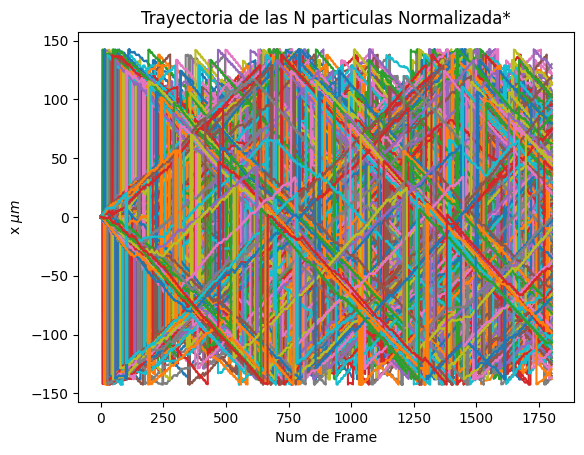

In [8]:
num_of_particles = trj['id'].max()
n = trj['id'].max()-1
for i in range(num_of_particles):
    #plt.plot(sims[i].index.get_level_values('frame'),sims[i].x)
    #print(len(sims[i].y.tolist()))
    trjpart = trj[trj['id'] == i+1]
    #print(trjpart)
    s = trjpart.x.tolist()
    d = s[0]
    #print(len(s))
    sn = [x - d for x in s]
    plt.plot(sn)
plt.title("Trayectoria de las N particulas Normalizada*")
plt.xlabel("Num de Frame")
plt.ylabel(r"x $\mu{}m$")

Filtering Data by points crossed

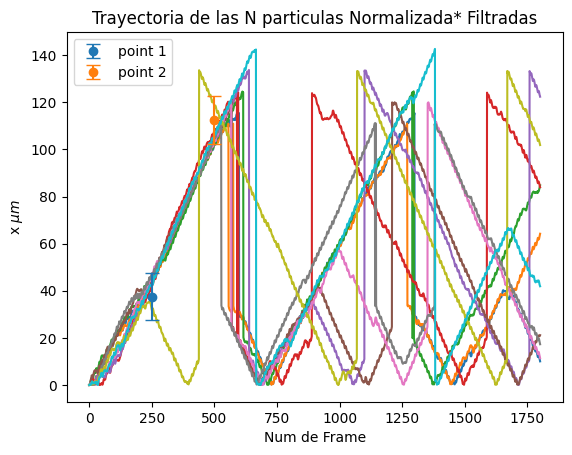

In [9]:
val1 = 37.5 #At frm1
val2 = 112.5 #At frm2
frm1 = 250
frm2 = 500
ep = 10 #epsilon

for i in range(num_of_particles):
    #plt.plot(sims[i].index.get_level_values('frame'),sims[i].x)
    #print(len(sims[i].y.tolist()))
    trjpart = trj[trj['id'] == i+1]
    #print(trjpart)
    s = trjpart.x.tolist()
    d = s[0]
    #print(len(s))
    sn = [abs(x - d) for x in s]
    if approx(sn[frm1], val1, ep) and approx(sn[frm2], val2, ep):
        plt.plot(sn)
#Points in common **
#plt.plot([frm1], [val1], 'go', label="point 1")
#plt.plot([frm2], [val2], 'go', label="point 2")
plt.errorbar(frm1, val1, yerr=ep, fmt="o", capsize=5, label = "point 1")
plt.errorbar(frm2, val2, yerr=ep, fmt="o", capsize=5, label = "point 2")

plt.title("Trayectoria de las N particulas Normalizada* Filtradas")
plt.xlabel("Num de Frame")
plt.ylabel(r"x $\mu{}m$")
plt.legend()